In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.decomposition import PCA
import seaborn as sns

In [8]:
data = pd.read_csv("OnlineNewsPopularity.csv")

In [12]:
data.columns = cleancols(data.columns)
df = data.drop(columns = ['url','timedelta'],axis = 1) 

In [9]:
def cleancols(cols):
    x = [y.lower().strip() for y in cols]
    return x

In [22]:
pca = PCA(n_components = 12)
df_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns)
df_red = pca.fit_transform(df_scaled) #applying PCA on the standardized data
explainedfeats = pd.DataFrame(pca.components_,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'],columns = df.columns)

In [28]:
explainedfeats

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
PC-1,0.041670,-0.149610,-0.006688,-0.010038,-0.009541,-0.166444,-0.135475,-0.089595,-0.059639,-0.293013,...,-0.076572,-0.351839,0.190456,0.166932,0.105295,-0.069361,-0.078929,0.039550,-0.082493,-0.018223
PC-2,0.070343,0.074106,-0.000426,0.000549,-0.000951,0.105775,0.006057,0.106250,0.136108,0.022807,...,0.035814,0.026124,-0.259754,-0.282511,-0.042658,0.081423,-0.067858,-0.021658,0.064145,0.041901
PC-3,0.012105,-0.143031,-0.009663,-0.013853,-0.012756,-0.034941,-0.029938,0.012517,0.028929,-0.190067,...,-0.007098,-0.075707,0.150512,0.220517,-0.008050,0.090693,0.118231,-0.073843,0.100274,0.057512
PC-4,-0.003669,-0.005864,0.576622,0.576345,0.576476,-0.006388,0.002880,0.012643,-0.002513,0.011470,...,0.004755,-0.012938,0.007593,0.014099,-0.003695,-0.008581,-0.004395,-0.002627,-0.008761,0.000598
PC-5,-0.055673,0.043355,0.015017,0.016638,0.014438,0.058760,0.065809,0.077339,-0.046966,-0.039193,...,-0.006207,-0.037980,0.043838,0.001329,0.065232,-0.034935,-0.025344,0.045177,-0.034094,0.032867
PC-6,-0.078694,-0.014383,-0.010529,-0.009905,-0.008042,-0.023800,-0.016750,-0.120668,-0.073746,0.174750,...,0.034267,0.013354,-0.034196,-0.021703,-0.057663,-0.299577,-0.187141,0.247804,-0.300770,0.004631
PC-7,-0.049372,-0.242163,0.001710,-0.004885,0.002286,-0.213062,-0.219114,-0.199320,0.014004,0.060849,...,0.148064,-0.055717,-0.120542,0.010284,-0.176673,-0.025681,-0.057388,0.035214,-0.031976,-0.023383
PC-8,-0.020591,0.229244,0.000432,0.006505,0.001751,0.175987,0.077747,0.065471,-0.044447,0.050836,...,-0.169894,0.104642,0.057633,-0.069171,0.137810,-0.114854,-0.033360,0.089927,-0.101038,-0.015896
PC-9,0.031125,0.075498,0.006012,0.008052,0.007160,0.015719,-0.062578,-0.081983,-0.027253,0.013952,...,-0.158808,-0.000955,0.025148,-0.044402,0.068426,0.314845,0.220949,-0.288656,0.328019,0.007469
PC-10,0.100833,-0.086475,0.002089,0.000689,0.002867,-0.084742,-0.122171,-0.080649,-0.038515,0.105977,...,0.145277,0.032130,0.008939,0.045532,-0.053963,0.243523,0.161617,-0.186307,0.245140,-0.024872


In [24]:
import seaborn as sns

In [25]:
correlation = df.corr()

In [26]:
correlation = df.corr()

<AxesSubplot:>

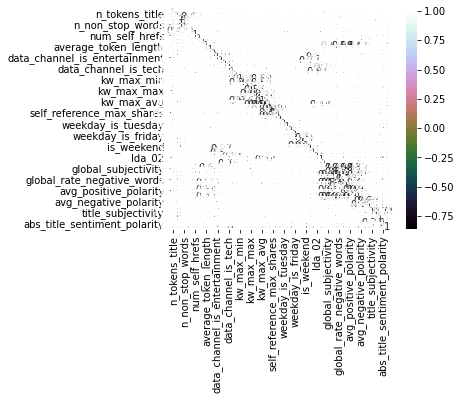

In [27]:
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix', linewidths=.5)

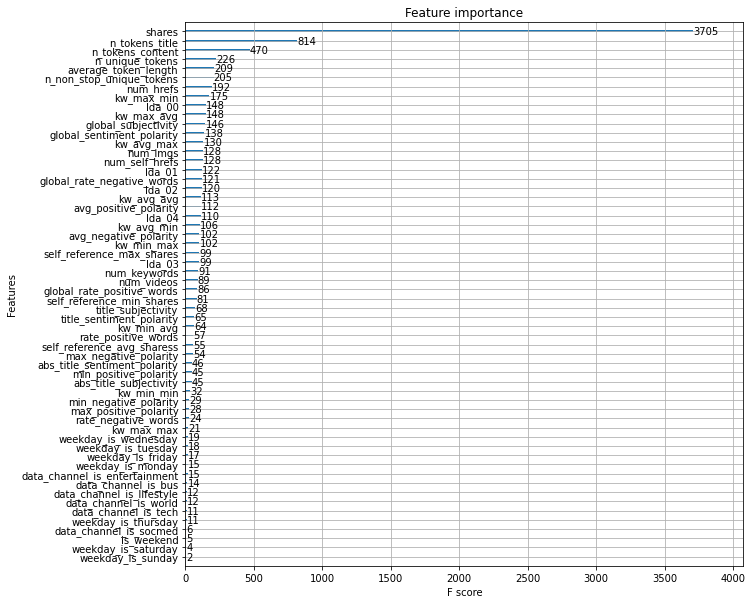

In [30]:
y_labels = data['shares']
xgb = XGBRegressor(max_depth = 10,random_state = 42)
xgb.fit(df,y_labels)
fig, ax = plt.subplots(1,1,figsize=(10,10))
impplot = plot_importance(xgb,ax = ax)
plt.show()

In [31]:
impfeats = [impplot.get_yticklabels()[::-1][i].get_text() for i in range(0,20)]
print(impfeats)

['shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'average_token_length', 'n_non_stop_unique_tokens', 'num_hrefs', 'kw_max_min', 'lda_00', 'kw_max_avg', 'global_subjectivity', 'global_sentiment_polarity', 'kw_avg_max', 'num_imgs', 'num_self_hrefs', 'lda_01', 'global_rate_negative_words', 'lda_02', 'kw_avg_avg', 'avg_positive_polarity']


In [2]:

    """
    Calculate the labels for each feature, and then the mean and 's' values, 
    then the fischer score.
    """

    # Opening the file, and extracting each line
    fp = open('OnlineNewsPopularity.csv','r')
    data_lines = fp.readlines()

    # The first line consists of all features, we extract number and names.
    feature_names = data_lines[0].split(",")
    feature_count = len(feature_names)
    instance_count = len(data_lines)
    # print instance_count

    # Initializing some values
    count_label1 = 0
    count_label2 = 0
    label = [0 for x in range(instance_count)]
    sum1 = [0.00 for x in range(feature_count)]
    sum2 = [0.00 for x in range(feature_count)]
    mean1 = [0.00 for x in range(feature_count)]
    mean2 = [0.00 for x in range(feature_count)]
    s1_squared = [0.00 for x in range(feature_count)]
    s2_squared = [0.00 for x in range(feature_count)]
    F = [0.00 for x in range(feature_count)]

    # Classifying each instance using the labels
    for i in range(instance_count):
        if i != 0:
            items = data_lines[i].split(",")
            # print items[feature_count-1]
            if int(items[feature_count-1]) > 1400:
                label[i] = 1
                count_label1 += 1
            else:
                label[i] = 2
                count_label2 += 1

    # Finding sums and means of features
    for j in range(feature_count):
        if j != 0:
            for i in range(instance_count):
                if i != 0:
                    items = data_lines[i].split(",")
                    val = float(items[j].strip())
                    if label[i] == 1:
                        sum1[j] += val
                    else:
                        sum2[j] += val
            mean1[j] = sum1[j]/count_label1
            mean2[j] = sum2[j]/count_label2

    # Finding the variance, and the Fischer Value
    for j in range(feature_count):
        if j != 0:
            for i in range(instance_count):
                if i != 0:
                    items = data_lines[i].split(",")
                    val = float(items[j].strip())
                    if label[i] == 1:
                        s1_squared[j] += (val-mean1[j])*(val-mean1[j])
                    else:
                        s2_squared[j] += (val-mean2[j])*(val-mean2[j])
            F[j] = ((mean1[j] - mean2[j])*(mean1[j] - mean2[j]))/(s1_squared[j] + s2_squared[j])


    # Making a dict with Fisher Values and Feature Names, and Sorting
    mapping = dict(zip(feature_names, F))
   


In [30]:
feature_names


['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_

In [22]:
fn_1 = feature_names[:30]
fn_2 = fn_1[:15]
fn_2

['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment']

In [31]:
F


[0.0,
 2.1116582575524915e-07,
 1.912480309408328e-07,
 1.6441817063781056e-07,
 1.0500381518613432e-09,
 1.9870963056706167e-09,
 5.905619718412224e-10,
 7.94136357603285e-07,
 1.1039667391898884e-07,
 4.5505366531113097e-07,
 8.955913521752756e-09,
 9.432142531346182e-08,
 4.946400089326732e-07,
 1.3842616687369526e-07,
 1.2487691770628913e-06,
 6.717417530172983e-09,
 1.2393000861924652e-06,
 9.256209792869158e-07,
 2.3459342794448073e-06,
 2.533845760380869e-07,
 8.015003633007656e-08,
 1.4821436486814466e-07,
 7.529992588150323e-09,
 1.2477071554150821e-07,
 2.76713615602508e-08,
 8.68739793561886e-07,
 5.673925551983897e-07,
 2.721765766097109e-06,
 2.7071175742748947e-07,
 3.479237171935889e-07,
 4.0517914921999697e-07,
 3.962524534009578e-08,
 1.4023111072067428e-07,
 1.8812880667342943e-07,
 7.134891455623262e-08,
 5.6178470057816305e-09,
 1.1624342762955485e-06,
 6.77855183276189e-07,
 1.948049892903834e-06,
 4.2579094008303445e-07,
 5.806944561130572e-07,
 2.532727644466284e

<BarContainer object of 61 artists>

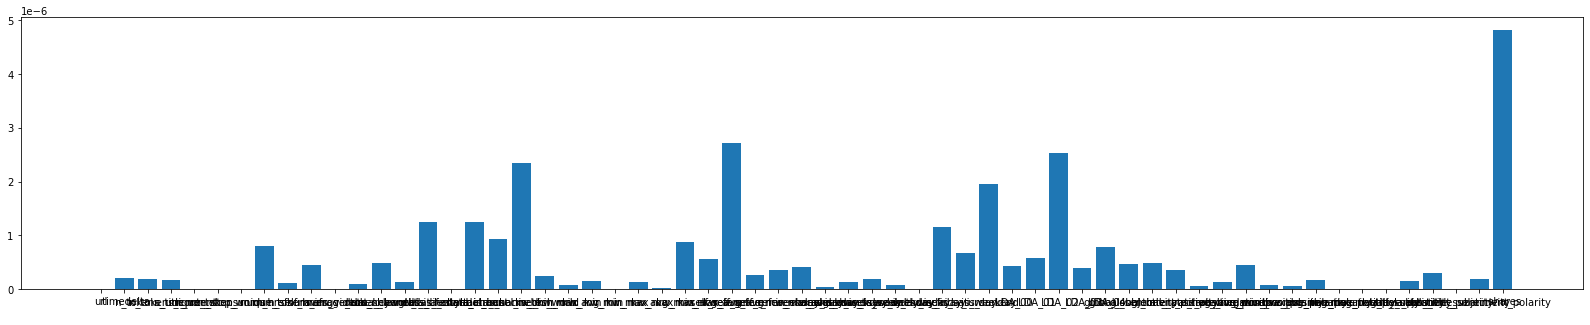

In [25]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(28,5))
plt.bar(feature_names, F)

In [26]:
mapping

{'url': 0.0,
 ' timedelta': 2.1116582575524915e-07,
 ' n_tokens_title': 1.912480309408328e-07,
 ' n_tokens_content': 1.6441817063781056e-07,
 ' n_unique_tokens': 1.0500381518613432e-09,
 ' n_non_stop_words': 1.9870963056706167e-09,
 ' n_non_stop_unique_tokens': 5.905619718412224e-10,
 ' num_hrefs': 7.94136357603285e-07,
 ' num_self_hrefs': 1.1039667391898884e-07,
 ' num_imgs': 4.5505366531113097e-07,
 ' num_videos': 8.955913521752756e-09,
 ' average_token_length': 9.432142531346182e-08,
 ' num_keywords': 4.946400089326732e-07,
 ' data_channel_is_lifestyle': 1.3842616687369526e-07,
 ' data_channel_is_entertainment': 1.2487691770628913e-06,
 ' data_channel_is_bus': 6.717417530172983e-09,
 ' data_channel_is_socmed': 1.2393000861924652e-06,
 ' data_channel_is_tech': 9.256209792869158e-07,
 ' data_channel_is_world': 2.3459342794448073e-06,
 ' kw_min_min': 2.533845760380869e-07,
 ' kw_max_min': 8.015003633007656e-08,
 ' kw_avg_min': 1.4821436486814466e-07,
 ' kw_min_max': 7.529992588150323e-

In [29]:
np.sort(mapping,axis=0)

AxisError: axis 0 is out of bounds for array of dimension 0